<center><h2>DS102 Problem Set - Week 4</h2></center>
**Hackwagon Academy**

`HWA-DS102-PS4-201810`
<hr>

If you have any questions to the Problem Set, feel free to send a message to your TAs or Instructors in the Telegram chat. You are encouraged to also discuss the problem sets within your own groups.

<div class="alert alert-success">Before you start, fill in your details for this notebook and rename the notebook to `<First_Name>_<Last_Name>-problem-set-week-4`, for example `jane-doe-problem-set-week-4`.</div>

In [ ]:
# Rename the notebook. Then, fill in your details here.
# Name  : Yam Hui Min Barbara Rebecca
# Class : 5 May 2019, 7pm

#### Datasets Required:

- `blogpost-1.txt`

- `blogpost-2.txt`

- `blogpost-1-terms.csv`

- `blogpost-2-terms.csv`

- `nltk-english-stopwords.csv`

In [5]:
# import the relevant packages
import re
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# import the relevant libraries from nltk
import nltk
nltk.download("stopwords")
nltk.download("words")

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yamba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\yamba\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Introduction
In this problem set, you will be asked to perform text analysis on two blogposts about their holiday in S. Korea. By the end of the problem set, you would be able to retrieve keywords that are useful for a traveller who intends to plan for his/her holiday to S. Korea.

### Part 1 (3 Marks)
Mark breakdowns are stated in the question e.g. **`[1]`**. For questions wtih short answers, <span style="color:darkblue">**both the <u>code</u> and <u>typed answers</u> must be provided to receive full credit.**</span>

**1A**. 

**i)** Read `blogpost-1.txt` into a string variable called `post1`. This is the text from a blogpost titled [Seoul Travel Guide for Food Lovers!](https://migrationology.com/travel-guides/seoul-korea/) by Mark Wiens. Use `split()` and `len()` to find out how many tokens are there in `post1`. **`[0.5]`**

In [7]:
# Read blogpost-1.txt into a string variable called post1
# Write your code here
# Hint: Use the following code to help you:
post1 = ''
with open('blogpost-1.txt', encoding="utf8") as f1:
    post1 = f1.read()    

# How many tokens are there in post1?
# Write your code here
post1_list = post1.split()
len(post1_list)

# Type your answer here
#2966 tokens in post 1.

2966

**ii)** Read `blogpost-2.txt` into a string variable called `post2`. This is the text from a blogpost titled [JESSICA'S SEOUL TRAVEL DIARY 2017](http://www.jessica-chaw.com/2017/04/jessicas-seoul-travel-diary-2017.html) by Jessica Chaw. Using `split()` and `len()` to find out how many tokens there are in `post2`. **`[1]`**

In [8]:
# Read blogpost-2.txt into a string variable called post2
# Write your code here
#
post2 = ''
with open('blogpost-2.txt', encoding="utf8") as f1:
    post2 = f1.read()

# How many tokens are there in post2?
# Write your code here
post2_list = post2.split()
len(post2_list)

# Type your answer here
# 1302 tokens in post 2. 

1302

**1B**.

**i)** Using string indexing or otherwise, store the first 1000 characters from `post1` in a string called `s1`. Convert all the characters in `s1` into lower case. `print()` your result. **`[0.5]`**

In [9]:
# Construct and print s1
# Write your code here.
#

s1 = post1[:1000]   
s1 = s1.lower()

# print your result

print(s1)

in this seoul travel guide for food lovers i’m going to share with you practical information about where to stay, how to get around, and most importantly, what to eat when you’re in seoul.
there are a lot of amazing things about seoul, but for you and i as food lovers, it’s the never ending amount of delicious food that makes seoul such an exciting city.
seoul travel guide for food lovers!
incheon international airport near seoul
arriving and leaving seoul
there are a number of ways you could enter seoul, but likely, if you take an international flight from a different country, you’ll land at incheon international airport.
incheon international airport
incheon international airport is a giant airport that caters to basically the entire northern part of south korea, and is located approximately 1 hour by train from the center of seoul. the airport is very nice and modern with easy transportation facilities (and there’s free wifi as well). i’ve even spent the night at seoul incheon airpo

**ii)**. Slice the first 2000 characters from `post2` and store them in in a string called `s2`. `print()` the result `s2`. Then, instantiate a new string `s3` by uncommenting the line below. What does the line to get `s3` do? Explain in terms of the differences between what you see across `s2` and `s3`. **`[1]`**

In [10]:
# Construct and print s2
# Write your code here.
#
s2 = ''
s2 = post2[:2000]
print('---s2 -----')
# print your result
print(s2)

# Uncomment the following lines to show the result of s3.
s3 = re.sub('[-!,\(\).+/:\[\]–]',' ', s2)
print('--- s3 -----')
print(s3)

# What does the line to get s3, in particular the re.sub() function call, do? 
# Type your answer here
# It removes the special characters such as the following [-!,\(\).+/:\[\]–] and replaces them
# with a blank space.

---s2 -----
Hi guys, I'm back from my Korea trip with my brother! It's my second time in Seoul (the last time I visited Seoul was last year May) and to be honest, I still couldn't get enough of this city! This time around, I didn't go to a lot of tourist spots like how I did during my first Korea trip. So if you haven't been to Seoul and are looking for a Seoul travel itinerary + tips for first-timers, you can read my Korea Travel Guide, which I wrote last year.

OK, if you are following my Instagram, you would have probably already seen my pictures with my boyfriend, which I haven't really shared/announced on my blog..I am not sure if you guys could remember, but my previous blog post "The Last Hug" was actually about him. Just to clear off some of your doubts, my boyfriend is not a Korean oppa lolol. He is a Dutch Chinese from Netherlands and we knew each other from the company that I interned at. He is currently studying in Korea as an exchange student until June so I just thought w

<div class="alert alert-success">
**Checkpoint**: When you have completed Part 1, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will **override** it.
</div>
### Part 2 (9 Marks)
Mark breakdowns are stated in the question e.g. **`[1]`**. <span style="color:darkblue">**Where stated, both the <u>code</u> and <u>typed answers</u> must be provided to receive full credit.**</span>

The words in each blogpost from Part 1 are stored as a list of terms in `blogpost-1-terms.csv` and `blogpost-2-terms.csv` respectively. Note that the `term` appearing in the first line for all 2 files is the header. 

**2A.** Using the `pandas` library, `csv` library or otherwise, 

1. read the the terms from `blogpost-1-terms.csv` into a list of terms `blog1_terms`
2. read the terms from `blogspot-2-terms.csv` into a list of terms `blog2_terms`

In other words, the first $5$ terms of `blog1_terms` and `blog2_terms` respectively are:

```python
blog1_terms[:5] == ['in', 'this', 'seoul', 'travel', 'guide']
blog2_terms[:5] == ['hi', 'guys', 'im', 'back', 'from']
```
**`[1]`**

In [11]:
# Read the the terms from blogpost-1-terms.csv into a list blog1_terms
# Write your code here
blog1_terms_df = pd.read_csv('blogpost-1-terms.csv')

blog1_terms = []
for item in blog1_terms_df['term']:
    blog1_terms.append(item)

blog1_terms[:5]

#blog1_terms = blog1_terms_df['term'].tolist()
# Read the the terms from blogpost-2-terms.csv into a list blog2_terms
# Write your code here
blog2_terms_df = pd.read_csv('blogpost-2-terms.csv')
blog2_terms = []
for item in blog2_terms_df['term']:
    blog2_terms.append(item)

blog2_terms[:5]


['hi', 'guys', 'im', 'back', 'from']

**2B.** In the `nltk` library, there is a corpus called the `stopwords` corpus. Using [this Stackoverflow answer](https://stackoverflow.com/questions/19130512/stopword-removal-with-nltk) or otherwise, extract only the English stopwords from `stopwords` and store it as a list called `blog_stopwords`. **`[0.5]`**

In [12]:
# Using stopwords from nltk.corpus, store all English stopwords into blog_stopwords
# Write your code here

blog_stopwords = stopwords.words('english')

**2C.** How many terms are there in `blog1_terms` and `blog2_terms`? Use `len()` of a `list` to find out. **`[0.5]`**

In [15]:
# How many terms are there in blog1_terms and blog2_terms?

# Write your code here
#
len(blog1_terms)
len(blog2_terms)
# Type your answer here
# 2954 terms in blog1_terms.
# 1299 terms in blog2_terms.

1299

**2D. (Stemming, follwed by finding unique words)** 

**i)** Instantiate a new list called `blog1_terms_step1`. Iterate through all the terms in `blog1_terms` and store the stemmed term using `PorterStemmer.stem(word)` in `blog1_terms_step1`. Do the same for `blog2_terms`. Store the list of stemmed words into `blog2_terms_step1`.  **`[1]`**

In [44]:
# Create the lists blog1_terms_step1 and blog2_terms_step1
# Uncomment the following lines of code to get the PorterStemmer object
blog1_terms_step1 = []
blog2_terms_step1 = []

s = PorterStemmer()

# Complete the code here

for word in blog1_terms:
    stemmed_word = s.stem(word)
    blog1_terms_step1.append(stemmed_word)

for word in blog2_terms:
    blog2_terms_step1.append(s.stem(word))

#len(blog1_terms_step1)

**ii).** Find the **unique** terms in `blog1_terms_step1`
and `blog2_terms_step1` and store them **as a** `list`. Specifically, store the unique terms in `blog1_terms_step1` in a list called `uniq_blog1_terms_step1` and store the unique terms in `blog2_terms_step1` in a `list` called `uniq_blog2_terms_step1`. 

Clue: You can use the `set()` function, or iterate through every term using a 

```python
for t in blog1_terms_step1``` 

loop. Other methods are also accepted. **`[1]`**

In [32]:
# Create the lists uniq_blog1_terms_step1 and uniq_blog2_terms_step1
# WARNING: Take note of the datatype!
# Complete the code here

uniq_blog1_terms_step1 = []
uniq_blog2_terms_step1 = []

uniq_blog1_terms_step1= list(set(blog1_terms_step1))
uniq_blog2_terms_step1 = list(set(blog2_terms_step1))

#uniq_blog2_terms_step1

**iii) ** How many terms are there in `uniq_blog1_terms_step1` and `uniq_blog2_terms_step1`? Use `len()` of a `list` to find out. **`[0.5]`**

In [31]:
# How many terms are there in blog1_terms and blog2_terms?
# Write your code here
#
len(uniq_blog1_terms_step1)
len(uniq_blog2_terms_step1)
# Type your answer here
#722 terms in uniq_blog1_terms_step1
#488 terms in uniq_blog2_terms_step1

488

**2E. (Removal of stopwords)**

**i)** Instantiate a new list called `blog1_terms_step2`. Iterate through all the terms in `uniq_blog1_terms_step1` and store the term in `blog1_terms_step2` if the length of the word is **2 and above** **and** the word is **not in the list** `blog_stopwords`. (You have already got `blog_stopwords` from question **2B**. Do the same for `blog2_terms_step1`. Store the filtered list into `blog2_terms_step2`.  You may choose to use the function `is_valid_word()`. **`[1]`**

In [40]:
# You may choose to use this function to help you
def is_valid_word(word, list_of_reject_words, min_length):
    if len(word) >= min_length and word not in list_of_reject_words:
        return True

In [47]:
# Create the lists blog1_terms_step2 and blog2_terms_step2
# Write your code here

blog1_terms_step2 = []
blog2_terms_step2 = []

for word in blog1_terms_step1:
    if is_valid_word(word,blog_stopwords,2) ==True:
        blog1_terms_step2.append(word)
        
for word in blog2_terms_step1:
    if is_valid_word(word,blog_stopwords,2) ==True:
        blog2_terms_step2.append(word)

**2F. (Finding common words in both blogs)** Instantiate a new list called `blog_common_words`. This stores all **unique** words that appears in both lists `blog1_terms_step2` and `blog2_terms_step2`. How many terms are there in `blog_common_words`? **`[1]`**

In [54]:
# Create the list blog_common_words 
# Write your code here

blog_common_words = [x for x in blog1_terms_step2 if x in blog2_terms_step2]
blog_common_words = set(blog_common_words)

# How many terms are there in blog_common_words? 
# Write your code here
len(blog_common_words) 

# Type your answer here
# 155 terms in blog_common_words.  

155

**2G. (Finding words related to Korean travel)** The `words` corpus has all the known English words in the dictionary. They are retrieved using `words.words()`, and are stored in a list `english_words` for you.

In [55]:
# Uncomment the following lines to get all words in english_words.
english_words = words.words()
len(english_words)

236736

**i)** Store all words in `blog_common_words` that do not exist in `english_words` in a list called `non_eng_blog_words`. `print` the list `non_eng_blog_words`. **`[0.5]`**

In [66]:
# print all words from blog_common_words that do not exist in english_words
# Write your code here

non_eng_blog_words = []
for word in blog_common_words:
    if word not in english_words:
        non_eng_blog_words.append(word)
        
non_eng_blog_words

['experi',
 'citi',
 'conveni',
 'hongda',
 'bukchon',
 '000',
 '15',
 'blog',
 'directli',
 'locat',
 'french',
 'anoth',
 'realli',
 'entir',
 'myeongdong',
 'ok',
 'accommod',
 'gu',
 'seoul',
 '110',
 'anguk',
 'korean',
 'whi',
 'gil',
 '14',
 'villag',
 'expens',
 'guid',
 'explor',
 'sinsa',
 '21',
 'wifi',
 'univers',
 'pretti',
 'im',
 'togeth',
 'complet',
 'dongdaemun',
 'becaus',
 'hanok',
 'korea',
 'befor',
 'bbq',
 'thi',
 '10',
 'peopl']

**2H.** The following plots are given to you. They are two bar plots plotting the frequency of a list of words.

- Suggest appropriate titles for the plot. **`[1]`**
- Why do the words (denoted in the $x$-axis) change from the first to the second bar plot? What does this tell you about the stopwords (that are also in the English dictionary) in relation to their frequency and meaning in English text? **`[1]`**

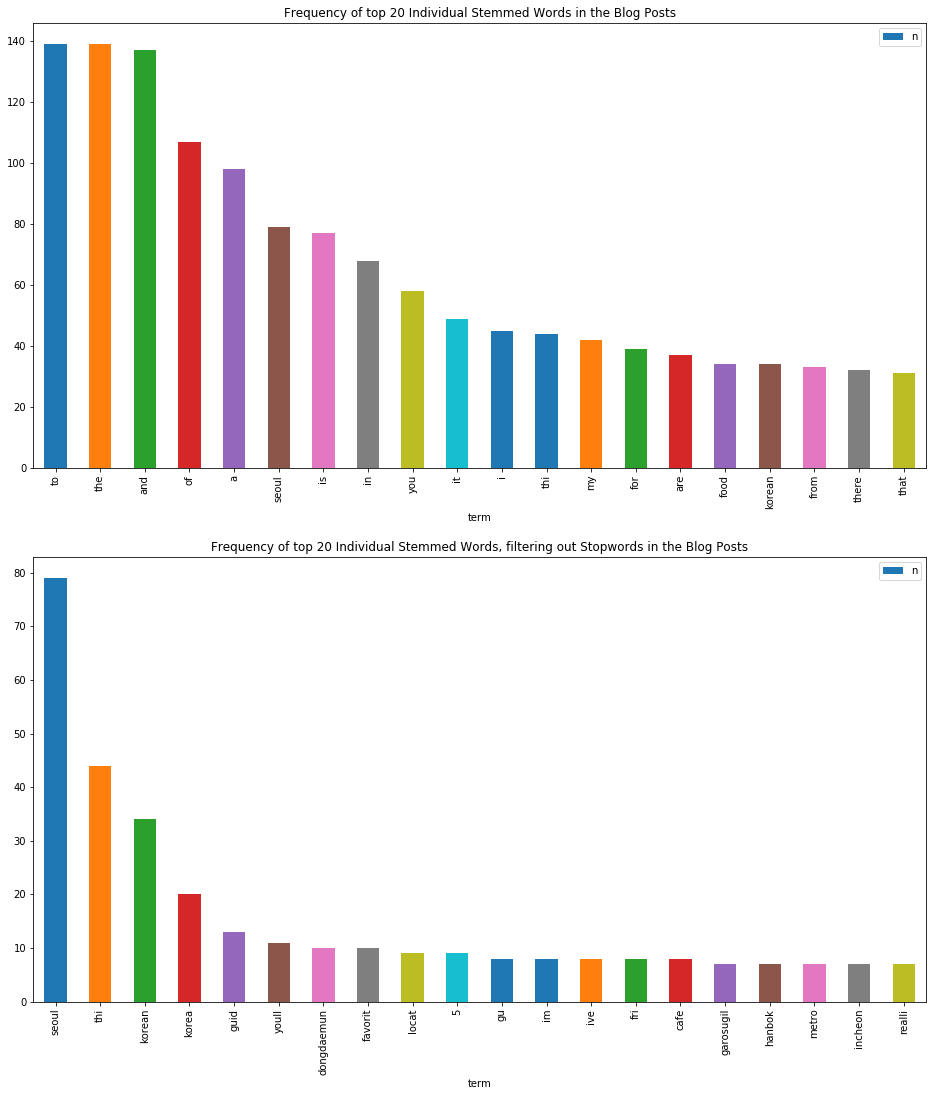

In [65]:
# Collect terms
blog_new = blog1_terms_step1 + blog2_terms_step1

blog_new_filtered = []
for term in blog_new:
    if term not in english_words:
        blog_new_filtered.append(term)

# Create the 2 DataFrames
blog_df = pd.DataFrame(blog_new, columns=['term'])
blog_filtered_df = pd.DataFrame(blog_new_filtered, columns=['term'])

# Aggregation & Sorting
blog_df_agg_df = blog_df.groupby('term').size().reset_index(name='n')
blog_df_agg_df.sort_values('n', ascending=False, inplace=True)

blog_df_filtered_agg_df = blog_filtered_df.groupby('term').size().reset_index(name='n')
blog_df_filtered_agg_df.sort_values('n', ascending=False, inplace=True)

# Plotting
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(211)
# Suggest an appropriate title for the plot. The title must contain this logic for full credit.
ax.set_title('Frequency of top 20 Individual Stemmed Words in the Blog Posts')
blog_df_agg_df[:20].plot(kind='bar', x='term', y='n', ax=ax)

ax2 = fig.add_subplot(212)
# Suggest an appropriate title for the plot. The title must contain this logic for full credit.
ax2.set_title('Frequency of top 20 Individual Stemmed Words, filtering out Stopwords in the Blog Posts')
blog_df_filtered_agg_df[:20].plot(kind='bar', x='term', y='n', ax=ax2)

plt.show()

# Why do the words (denoted in the x-axis) change from the first to the second bar plot? 
# The first graph did not exclude stopwords; so the stopwords with higher frequency in the posts 
# appear in the x-axis. 
# What does this tell you about the stopwords in relation to extracting real meaning?
# Some stopwords may have a high frequency appearing in blog posts, hence they appear on the x-axis
# but they merely smooth the sentences but do not have meaning on their own.
# It is important to filter out stopwords to extract real meaning of the blog posts.

<div class="alert alert-success">
**Checkpoint**: When you have completed Part 2, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will **override** it.
</div>